In [22]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import sympy as sym 
import random as rand

# Tarea 1

## Ecuaciones Ordinarias

1.

2.

In [217]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        
        self.f = self.m*self.a
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
    
        # Fisica
        self.K = 20.
        
        self.VEk = np.zeros(len(t))
        self.U=np.zeros(len(t))
        
        self.dist=np.zeros(len(t))
        
        self.angle=np.zeros(len(t))
        self.L=np.zeros(len(t))
        self.Dist=np.zeros(len(t))
        self.Angle=np.zeros(len(t))
        self.VMag=np.zeros(len(t))
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.a = self.f/self.m
        
        # Euler
        self.r += self.dt*self.v
        self.v += self.dt*self.a
        
        # Euler-Cromer
  #      self.v += self.dt*self.a
  #      self.r += self.dt*self.v
        
        
    def CalculateForce(self,p):
        
        d = np.linalg.norm(self.r - p.r)
        
        compresion = self.radius + p.radius - d
        
        if compresion >= 0:
            
            Fn = self.K * compresion**3
            
            self.n = (self.r - p.r)/d     
            self.f = np.add(self.f,Fn*self.n)
            # Falta implementar energía potencial 
            
     
    # Aca debes agregar la energía potencial
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
    
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
        self.Dist[i]=np.sqrt(self.r[0]**2 + self.r[1]**2)
        self.Angle[i]=np.tan(self.r[1]/self.r[0])
        
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        #Acá
        #self.VMag[i]=np.sqrt(self.v[0]**2 + self.v[1]**2)
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
        #self.U[i]=(1/2)*self.K*np.dot(self.r,self.r)
        #self.L[i]=self.m*self.VMag*self.Dist*np.sin(self.Angle)
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetPotential(self,scale=1):
        return self.U[::scale]
    #Acá
    #def GetAngularMomentum(self,scael=1):
     #   return self.L[::scale]
        
    
    
    # Debes agregar las paredes en este punto
    

In [218]:
def GetTenParticles(N,t):
    i=0
    TenParticles=[]
    while i<10:
        r=np.array([rand.uniform(-20.,20.),rand.uniform(-20.,20.)])
        v=np.array([rand.uniform(-5.,5.),rand.uniform(-5.,5.)])
        a=np.array([0.,0.])
        particle=Particle(r,v,a,t,m=1,radius=2,Id=i)
        
        i+=1
        TenParticles.append(particle)
        
    return TenParticles
        

In [219]:
dt = 0.001
tmax = 10
t = np.arange(0,tmax,dt)
Particles = GetTenParticles(1,t)

In [220]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [221]:
Particles = RunSimulation(t,Particles)

Running simulation: 100%|██████████| 10000/10000 [00:06<00:00, 1555.19 Steps/s]


In [222]:
# Bajamos dimensión de la simulacion
scale = 200
t1 = t[::scale]


<IPython.core.display.Javascript object>


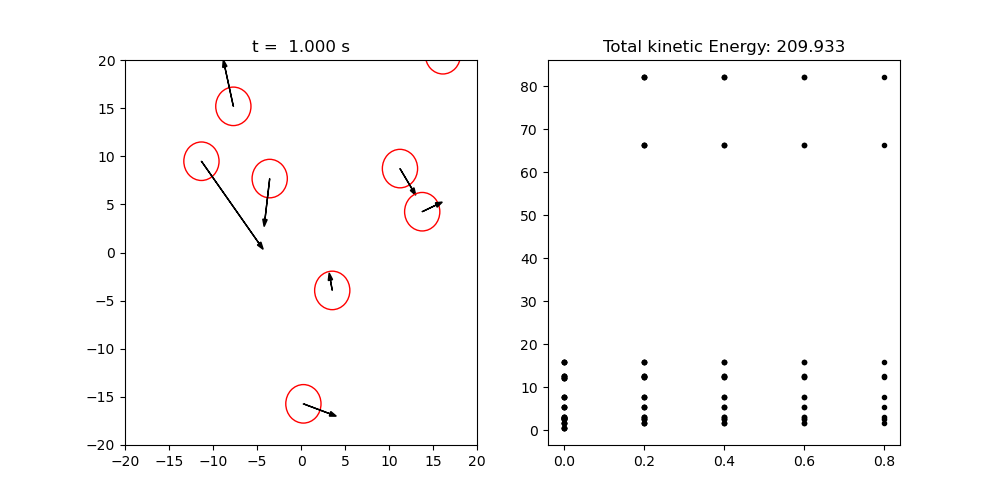

In [223]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)


a,b)

In [178]:
MomentumT = Particles[0].GetMomentum(scale)


In [179]:
for i in range(1,len(Particles)):
    MomentumT = np.add(MomentumT,Particles[i].GetMomentum(scale))


<IPython.core.display.Javascript object>


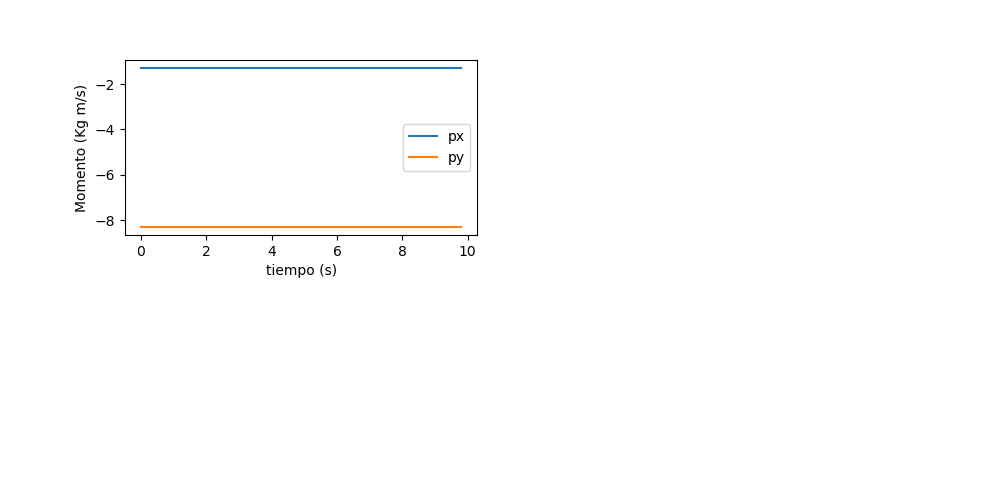

Text(0, 0.5, 'Momento (Kg m/s)')

In [180]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(221)
ax3.plot(t1,MomentumT[:,0],label='px')
ax3.plot(t1,MomentumT[:,1],label='py')
ax3.legend()
plt.xlabel("tiempo (s)")
plt.ylabel("Momento (Kg m/s)")

Sí se debería conservar .....

c)


..........

d)

In [181]:
KineticT = Particles[0].GetKineticEnergy(scale)


In [182]:
for i in range(1,len(Particles)):
    KineticT = np.add(KineticT,Particles[i].GetKineticEnergy(scale))


<IPython.core.display.Javascript object>


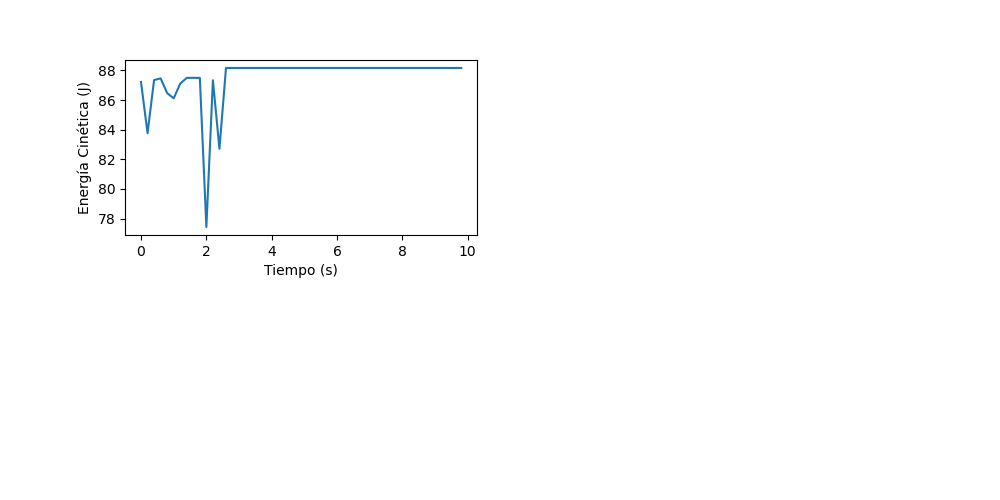

Text(0, 0.5, 'Energía Cinética (J)')

In [183]:
fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(221)
ax4.plot(t1,KineticT)
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía Cinética (J)")

Se conserva....

e)

In [184]:
PotentialT = Particles[0].GetPotential(scale)


In [185]:
for i in range(1,len(Particles)):
    PotentialT = np.add(PotentialT,Particles[i].GetPotential(scale))


<IPython.core.display.Javascript object>


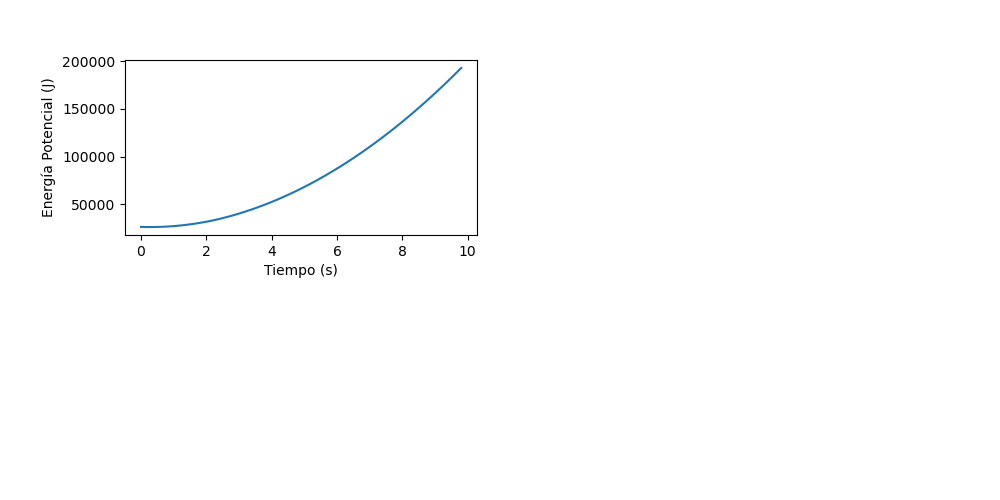

Text(0, 0.5, 'Energía Potencial (J)')

In [186]:
fig5 = plt.figure(figsize=(10,5))
ax5 = fig5.add_subplot(221)
ax5.plot(t1,PotentialT)
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía Potencial (J)")

f)

In [188]:
EMec=PotentialT+KineticT

<IPython.core.display.Javascript object>


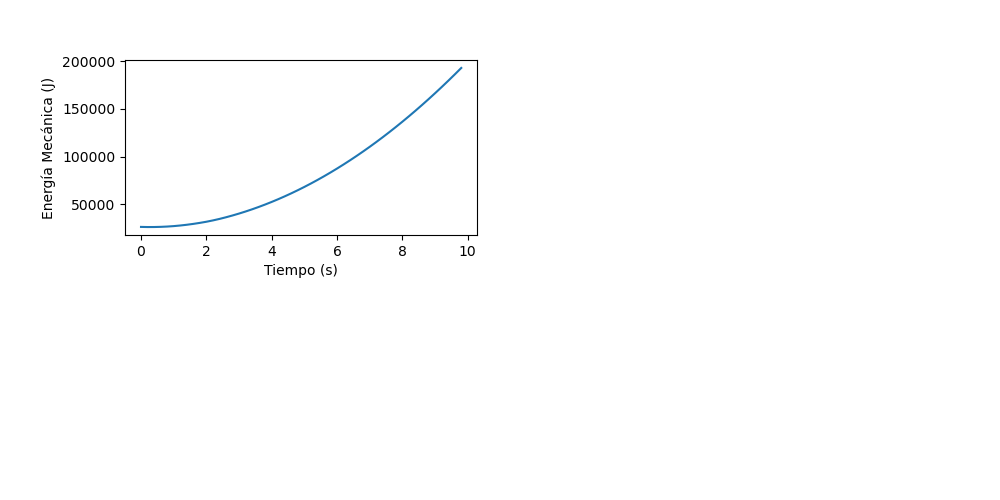

Text(0, 0.5, 'Energía Mecánica (J)')

In [189]:
fig6 = plt.figure(figsize=(10,5))
ax6 = fig6.add_subplot(221)
ax6.plot(t1,EMec)
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía Mecánica (J)")

g)

sí.....

h)

3.

Sabiendo que un año luz equivale a $9.461\times 10^{15}$ y que en un año hay $3.156\times 10^{7}$ segundos, se plantea el siguiente factor de conversión.

In [215]:
c=3e8
m=9.461e15


$$
3\times 10^8 \frac{m}{s} \times \frac{3.156\times 10^7 s}{1 año} \times \frac{1 año luz}{9.461\times 10^{15}m}
$$

In [216]:
c_au=c*(3.156e7)/m
c_au

1.0007398795053377

Teniendo en cuenta lo anterior, es acertado que la conversión dé aproximadamente 1, ya que, por deifinición, el año luz se refiere a la distancia que recorre la luz en un año.

4.

7.